In [1]:
from functions_py import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import pandas as pd 
# import cv2
import skimage as sk
import scipy.ndimage as nd
from array import array
from functions_MuonsNSAMP1 import *
import time

from ROOT import TProfile, TGraphErrors, TH2F, TLegend

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

# def Gaussian2(x,m1,s1,g1,a1, m2, s2, g2, a2): #data, mean, sigma, gain, height1, heigth2
#     return a1*np.exp(-1/2*((x-m1-g1)/s1)**2) + a2*np.exp(-1/2*((x-m2-g2)/s2)**2)

def Gaussian2(x,m,s,g,a1,a2): #data, mean, sigma, gain, height1, heigth2
    return a1*np.exp(-1/2*((x-m)/s)**2)+a2*np.exp(-1/2*((x-m-g)/s)**2)


def EnergySpectrum(x, N):
    return N * np.sin(x)*np.cos(x)**3

Colormap = 'jet'

# print(time.time())
# print(time.gmtime(0))

Welcome to JupyROOT 6.28/04


In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth": 3,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

Colormap = 'jet'

Filename: ../images/ENE2025/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (700, 400)   float32   
  1                1 ImageHDU       164   (700, 400)   float32   
  2                1 ImageHDU       164   (700, 400)   float32   
  3                1 ImageHDU       164   (700, 400)   float32   
None
----------------


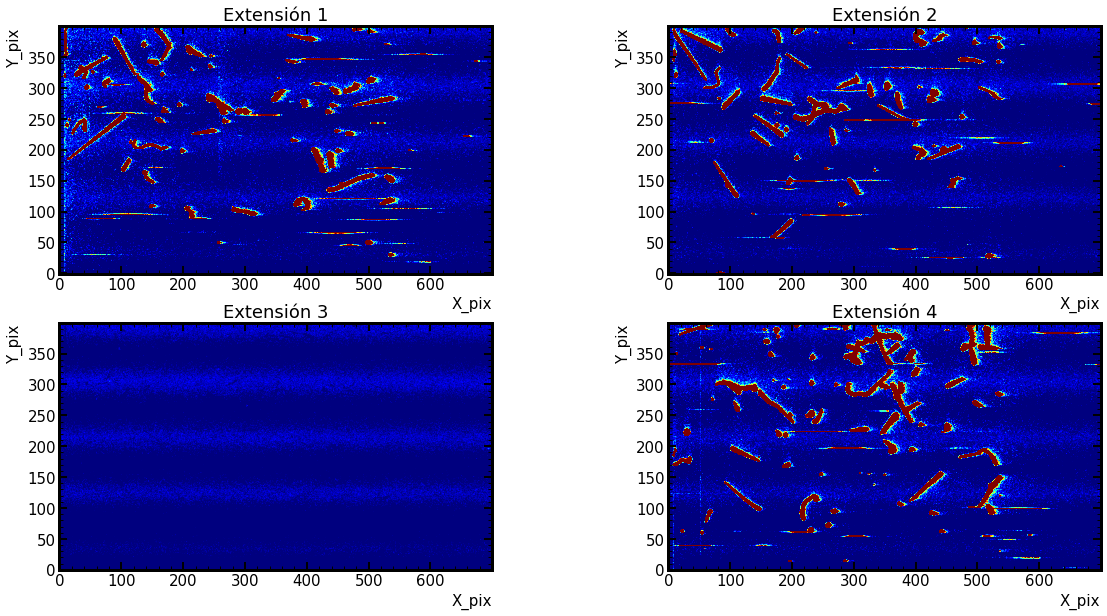

In [3]:
# path = '/home/labdet/Documents/MauSan/imagenesMicrochip/05JUN2023/proc_skp_m_009_microchip_vtested_T_170_seq_NSAMP_324_NROW_100_NCOL.fits'
# path = '/home/labdet/Documents/MauSan/imagenesMicrochip/17OCT23/am241_gammas/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_50_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_690.fits'
# path = '/home/labdet/Documents/MauSan/imagenesMicrochip/05JUN2023/proc_skp_m_009_microchip_vtested_T_170_seq_NSAMP_225_NROW_100_NCOL.fits'
# path = '/home/labdet/Documents/MauSan/imagenesMicrochip/05JUN2023/proc_skp_m_009_microchip_vtested_T_170_seq_NSAMP_144_NROW_100_NCOL.fits'
# path = '/home/labdet/Documents/MauSan/imagenesMicrochip/01NOV23/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_60_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_2.fits'
# path = '/home/labdet/Documents/MauSan/imagenesMicrochip/01NOV23/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_32.fits'


## DIRECCIONES DE COMPUTADORA DE CASA 
# path = '/home/bruce/Documents/imagenesMicrochip/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_25.fits'


# path = '/home/bruce/Documents/imagenesMicrochip/ENE24/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_62.fits'
# path = '/home/bruce/Documents/Programas/images/ENE2024/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_204.fits'

# path = '/home/bruce/Documents/Programas/images/AGO2024/proc_skp_m-009_microchip_T_170__NSAMP_324_NROW_650_NCOL_700_EXPOSURE_0_img_100.fits'


# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/images/AGO2024/proc_skp_m-009_microchip_T_170__NSAMP_324_NROW_650_NCOL_700_EXPOSURE_0_img_100.fits'
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/images/ENE2024/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_200.fits'

# path = '/home/bruce/Documents/Programas/images/AGO2024/proc_skp_m-009_microchip_T_170__NSAMP_324_NROW_650_NCOL_700_EXPOSURE_0_img_100.fits'
# path = '/home/bruce/Documents/Programas/images/AGO2024/proc_skp_m-009_microchip_T_170__NSAMP_324_NROW_650_NCOL_700_EXPOSURE_0_img_101.fits'
# path = '/home/bruce/Documents/Programas/images/AGO2024/proc_skp_m-009_microchip_T_170__NSAMP_324_NROW_650_NCOL_700_EXPOSURE_0_img_102.fits'

path = '../images/ENE2025/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_100.fits'
# path = '../images/ENE2024/proc_skp_m-009_microchip_T_170__Vv82_NSAMP_324_NROW_400_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_204.fits'



hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin = 10, vmax = 1000, cmap = Colormap)
    # plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin=100,vmax=1000, cmap = 'gray')
    plt.title('Extensión '+str(i+1))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()

# Sustrayendo el promedio por renglón

## Sustrayendo la media del renglon

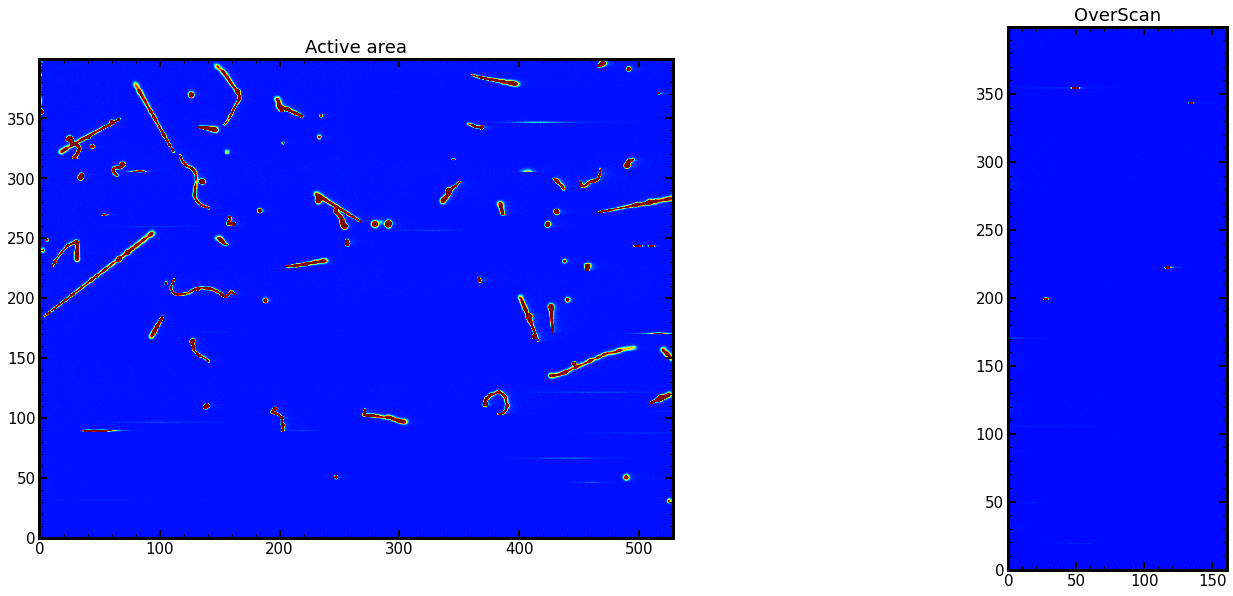

In [4]:
### Muestra el area activa y overscan de la extensión 

extension = 1
# plt.imshow(hdu_list[0].data[:, 550:], vmin = 0, vmax = 80000, origin = 'lower')
# Overscan = hdu_list[extension - 1].data[:300, 539:]
# active_area = hdu_list[extension - 1].data[:300, 10:539]

# Overscan = hdu_list[extension - 1].data[:250, 539:]
# active_area = hdu_list[extension - 1].data[:250, 10:539]

Overscan = hdu_list[extension - 1].data[:, 539:]
active_area = hdu_list[extension - 1].data[:, 10:539]


fig, axs = plt.subplots(1,2, figsize=[25,10])
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
axs[0].imshow(active_area, origin='lower', vmin = 100, vmax = 100000, cmap = Colormap)
axs[0].set_title('Active area')

axs[1].imshow(Overscan, origin='lower', vmin = 1000, vmax = 100000, cmap = Colormap)
axs[1].set_title('OverScan')

# plt.colorbar()
plt.show()

# fig, axs = plt.subplots(figsize=[10,10])
# active_area_mask=sk.measure.label(active_area>=np.max(active_area), connectivity=2)
# active_area_true=ma.masked_array(active_area,mask=(active_area_mask>0))
# plt.colorbar(location = 'bottom')
# plt.colorbar()

# fig.colorbar(x1, ax=axs[0])
# fig.colorbar(x2, ax=axs[1])

plt.show()


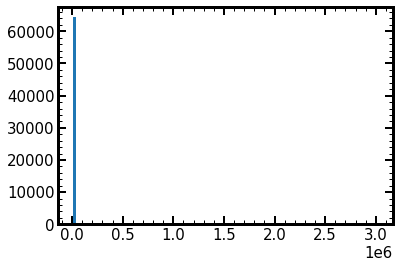

In [5]:
plt.hist(Overscan.flatten(), bins = 100)
# plt.yscale('log')
plt.show()

In [6]:
### Dimensiones de Overscan
print('Dimensiones Oscan: ', Overscan.shape)
oscan_x = Overscan.shape[1]
oscan_y = Overscan.shape[0]


### Dimensiones de Active Area
print('Dimensiones ActA: ', active_area.shape)
acta_x = active_area.shape[1]
acta_y = active_area.shape[0]

Dimensiones Oscan:  (400, 161)
Dimensiones ActA:  (400, 529)


In [7]:
### Se sustrae la mediana de cada renglón y se crea un arreglo
medi_rows_value = []
for element in np.arange(0, oscan_y):
    row = Overscan[element: element +1, 0: oscan_x]
    num_row = element + 1
    # plt.imshow(row, origin='lower')
    # plt.show()
    # print(row.shape)
    # print(type(row))
    # print(row.sum()/row.shape[1])
    medi_value = np.median(row)
    medi_rows_value.append([medi_value])
    # print((num_row, mean_value))

print(medi_rows_value[0])

[14305.377]


In [8]:
### Se le resta el valor de promedio de cada renglón a su respectivo renglon del area activa
true_active_area = active_area - medi_rows_value
print(active_area[1][1])
print(true_active_area[1][1])
### Se le resta el valor de promedio de cada renglón a su respectivo renglon del oScan
# true_Oscan = Overscan - mean_rows_value


true_Oscan = Overscan
min_oScan = np.min(true_Oscan)
# plt.imshow(true_active_area, origin='lower')

14381.926
63.265625


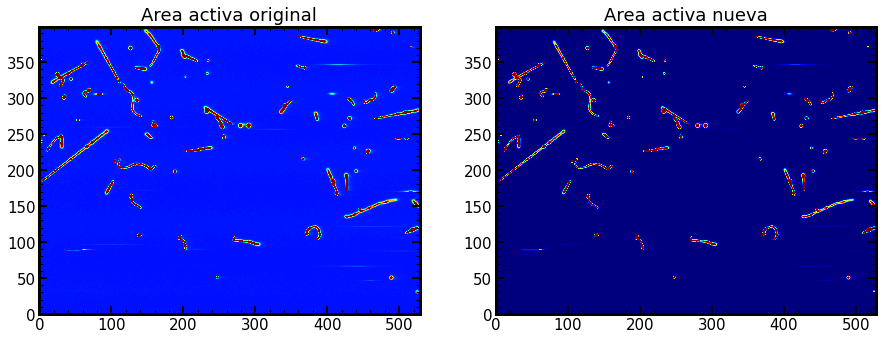

In [9]:
## Se muestra la comparación de la extensión original y despues de quitarle la mediana

Figsize = [15,15]
fig, axs = plt.subplots(1, 2, figsize=Figsize)
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
Vmin = 10
Vmax = 100000
axs[0].set_title('Area activa original')
axs[1].set_title('Area activa nueva')
x0 = axs[0].imshow(active_area, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
x1 = axs[1].imshow(true_active_area, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
# plt.colorbar()

# fig.colorbar(x0, ax=axs[0]) 
# fig.colorbar(x1, ax=axs[1])

# print(active_area.max())
# print(true_active_area.max())
plt.show()

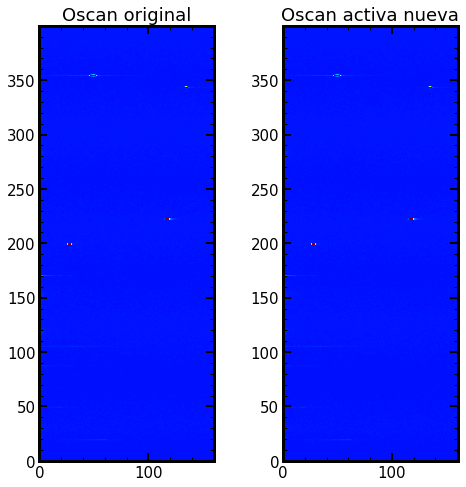

In [10]:
fig, axs = plt.subplots(1, 2, figsize=[8,8])
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
Vmin = 10
Vmax = 100000
axs[0].set_title('Oscan original')
axs[1].set_title('Oscan activa nueva')
x0 = axs[0].imshow(Overscan, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
x1 = axs[1].imshow(true_Oscan, origin='lower', vmin=Vmin, vmax = Vmax, cmap = Colormap)
# plt.colorbar()

# fig.colorbar(x0, ax=axs[0]) 
# fig.colorbar(x1, ax=axs[1])

# print(active_area.max())
# print(true_active_area.max())
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


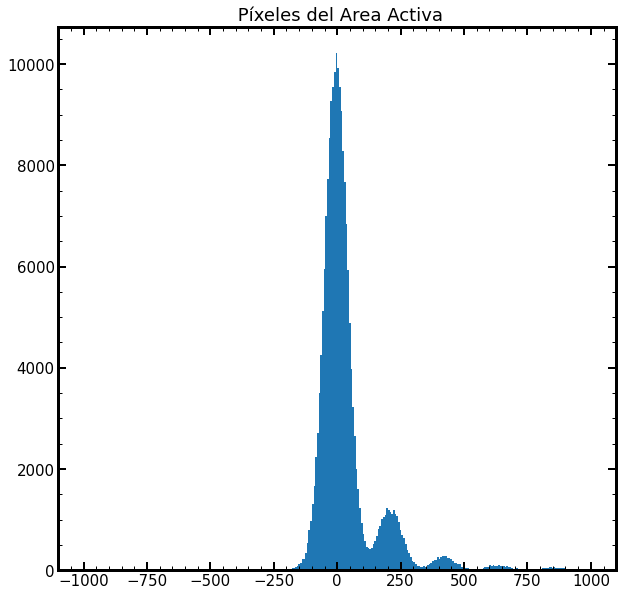

In [11]:
fig_all, axs_all = plt.subplots(1, 1, figsize=(10, 10))

# print(true_Oscan)
min_oScan = np.min(true_Oscan)

# act = true_active_area - offset
## Generamos el histograma de los pixeles del oScan especificando el rango
axs_all.hist(true_active_area.flatten(), bins= 300, range = (-1000, 1000))# , label="Pixeles del Overscan")
# axs_all.hist(active_area.flatten(), bins= 300, range = (-1000, 1000))# , label="Pixeles del Overscan")
# axs_all.hist(true_Oscan.flatten(), bins= 200, range = (8000, 9500))# , label="Pixeles del Overscan")


# axs_all.vlines(14651.275, ymin=0, ymax=900, colors='k', linestyle = 'dashed', label = 'Offset')
# axs_all.vlines(14720.0, ymin=0, ymax=2000, colors='r')

axs_all.set_title(' Píxeles del Area Activa')
plt.legend()

plt.show()

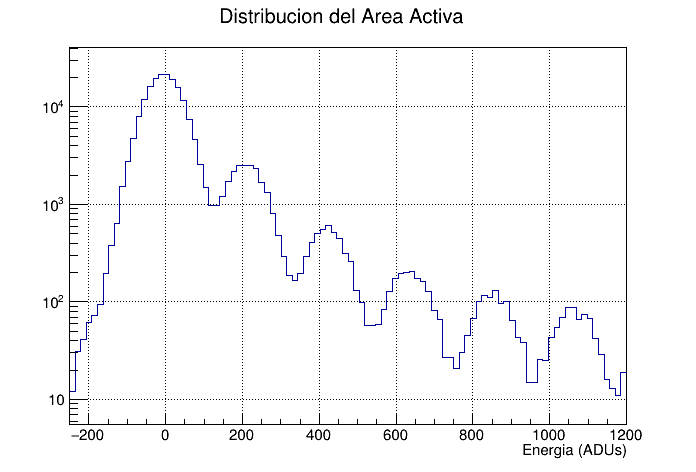

In [12]:
h2=TH1F("histogram", r"Distribucion del Area Activa", 100, -250, 1200)
# h3.AddDirectory(False)
for pixel_value in true_active_area.flatten():
    # if not np.ma.is_masked(pixel_value):
    h2.Fill(pixel_value)
    #print(pixel_value)

c1=TCanvas()
c1.SetLogy()
c1.SetGrid()
h2.SetStats(0)
h2.GetXaxis().SetTitle("Energia (ADUs)")
h2.Draw()
c1.Draw()

## Aplanando el Oscan

### Doble Gaussiana

Offset Value:  14438.937  ADUs
Parameters of the Doble-Gaussian Fit
Mean:  4.524127184147861  +-  0.5901155955604662
Sigma:  62.6851815616816  +-  0.435508477379559
Gain:  220.357362569624  +-  1.937943004053766
First Peak:  229.8949714531668  +-  1.277410971668082
Second Peak:  10.329234940736653  +-  0.28806617877158847 

chiSquare: 690.0168061027432
NDegrees of Freedom: 671
Prob: 0.29720896744428676 

 FCN=690.017 FROM MIGRAD    STATUS=CONVERGED     294 CALLS         295 TOTAL
                     EDM=4.66086e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.52413e+00   5.90116e-01  -2.08236e-05  -9.59648e-05
   2  p1           6.26852e+01   4.35508e-01   3.28911e-04  -7.60165e-05
   3  p2           2.20357e+02   1.93794e+00   2.85723e-03  -4.68098e-05
   4  p3           2.29895e+02   1.27741e+00  -3.22533e-04 

Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


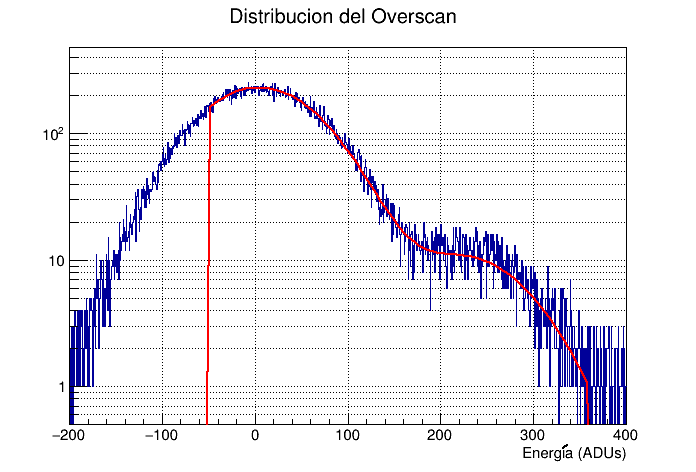

In [13]:
# min_oScan = np.min(true_Oscan)
# extension = 4
Bins = 1000
Bins_fit = Bins
# Range_fit = [-100, 400]

Range_fit = [-50, 360]
ratio_keV = 0.0037  ## KeV/e-

# data = hdu_list[extension-1].data[:, :550]
data = true_active_area
header = hdu_list[extension-1].header
# oScan=hdu_list[extension-1].data[:,550:]

hist , bins_edges = np.histogram(true_Oscan.flatten(), bins = Bins,  range=(min_oScan, 18000))
offset = bins_edges[np.argmax(hist)]
print('Offset Value: ', offset, ' ADUs')
Overscan_plane = true_Oscan - offset 
fgaus2 = TF1("fgaus2","[3]*exp(-0.5*((x-[0])/[1])^2)+[4]*exp(-0.5*((x-[0]-[2])/[1])^2)", Range_fit[0], Range_fit[1],5) # TF1("nombre", "funcion escrita como en root", min, max, #parametros)

h3=TH1F("histogram", r"Distribucion del Overscan",Bins_fit, -200, 400)
# h3.AddDirectory(False)
for pixel_value in Overscan_plane.flatten():
    # if not np.ma.is_masked(pixel_value):
    h3.Fill(pixel_value)
    #print(pixel_value)

fgaus2.SetParameters(0,40,210, 400, 50) # Establecer parametros iniciales del fit, de manera visual es posible determinarlos como una primera aproximacion
# fgaus2.SetParameters(3.999255762274112,62.819921446387646, 197.8901791750652, 106.11699858208667, 4.973093664397046)

h3.Fit(fgaus2, "R")


c1=TCanvas()
c1.SetLogy()
c1.SetGrid()
h3.SetStats(0)
h3.GetXaxis().SetTitle("Energ#acute{i}a (ADUs)")
h3.Draw()
fgaus2.GetXaxis().SetRangeUser(-100,10000)
fgaus2.Draw("same")
c1.Draw()

leg = TLegend(0.5, 0.7, 0.9, 0.9)
leg.AddEntry(h3, "Datos", "L")
leg.AddEntry(fgaus2, "Ajuste de doble gaussiana", "L")
# leg.Draw()

gStyle.SetOptFit(1100)

# # fgaus2.Draw('Quiet')
print('Parameters of the Doble-Gaussian Fit')
print('Mean: ', fgaus2.GetParameters()[0],  ' +- ', fgaus2.GetParError(0))
print('Sigma: ', fgaus2.GetParameters()[1],  ' +- ', fgaus2.GetParError(1))
print('Gain: ', fgaus2.GetParameters()[2],  ' +- ', fgaus2.GetParError(2))
print('First Peak: ', fgaus2.GetParameters()[3],  ' +- ', fgaus2.GetParError(3))
print('Second Peak: ', fgaus2.GetParameters()[4],  ' +- ', fgaus2.GetParError(4), '\n')
print("chiSquare: " + str(fgaus2.GetChisquare()))
print("NDegrees of Freedom: " + str(fgaus2.GetNDF()))
# print("chiSquare / NDF :", fgaus2.GetChisquare() / fgaus2.GetNDF())
print("Prob:", fgaus2.GetProb(), '\n')


In [14]:
delta_Bin = 0
dict_popt =  oScan_fit_NSAMP324_ROOT(extensión = extension, active_area = data, oScan = true_Oscan, Bins = Bins, Bins_fit=Bins_fit,
                                        make_figure_flag = False, range_fit=[-50, 360])


 FCN=989.402 FROM MIGRAD    STATUS=CONVERGED     471 CALLS         472 TOTAL
                     EDM=3.12032e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.35693e+00   5.96980e-01  -2.08324e-05  -1.81819e-04
   2  p1           6.29622e+01   4.42064e-01   4.60148e-04  -4.86561e-05
   3  p2           2.23114e+02   2.17674e+00   1.52509e-03  -2.92236e-06
   4  p3           1.56467e+02   8.47841e-01  -6.25517e-04  -5.82555e-05
   5  p4           6.54009e+00   1.88419e-01  -3.20091e-05   2.16977e-04


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


In [15]:
##### Sigma en e- ####
sig_ADUs = dict_popt['sigma']
Gain = dict_popt['Gain']
offset = dict_popt['Offset']

sig_elec = abs(( sig_ADUs) / Gain)
sig_KeV = sig_elec * ratio_keV
print('Gain: ', Gain, ' ADUs/e-')
print('Sigma: ', sig_ADUs, ' ADUs, ', sig_elec, ' e-, ' , sig_KeV, ' KeV')

Gain:  223.11350425756862  ADUs/e-
Sigma:  62.96215503222954  ADUs,  0.28219786714274464  e-,  0.0010441321084281553  KeV


Sigma:  0.0010441321084281553  keV


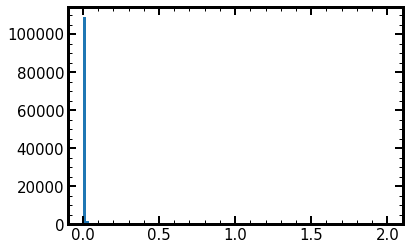

In [16]:
dataCal, sigma = data_calibrated_NSAMP(active_area = true_active_area, extension = extension, offset = offset, gain = Gain, ratio_keV = ratio_keV, unidades = 2, sigma_ADUs = sig_ADUs)
print('Sigma: ', sigma, ' keV')

plt.hist(dataCal.flatten(), bins = 100, range = (0, 2))
plt.show()

## Creacción del DataFrame de los clusters detectados

In [17]:
# min_energy_for_label = 100 * sigma
# dataCal = true_active_area
min_energy_for_label = 13 * sigma
label_img, nlabels_img = sk.measure.label(dataCal > min_energy_for_label, connectivity=2, return_num=True)
prop = sk.measure.regionprops(label_img, dataCal)

TotalDataFrame = event_DataFrame(dataCal=dataCal, label_img=label_img, nlabels_img =nlabels_img, 
                                    prop=prop, header=header, extension=extension, unidades = 2)

# TotalDataFrame[2200:2250]
# TotalDataFrame[50:100]
TotalDataFrame[0:50]

Events: 346


,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
1,100,1,7x7,38,11.603315,0.305,"[3.2632, 2.6579]"
2,100,1,1x1,1,0.017029,0.017,"[0.0, 0.0]"
3,100,1,1x1,1,0.014512,0.015,"[0.0, 0.0]"
4,100,1,4x1,4,0.070962,0.018,"[1.5, 0.0]"
5,100,1,1x1,1,0.017434,0.017,"[0.0, 0.0]"
6,100,1,1x1,1,0.020236,0.020,"[0.0, 0.0]"
7,100,1,1x1,1,0.016767,0.017,"[0.0, 0.0]"
8,100,1,1x1,1,0.020150,0.020,"[0.0, 0.0]"
9,100,1,1x1,1,0.015180,0.015,"[0.0, 0.0]"


## Visualizar un cluster y su información

95
Event Slice:
x: [4,99]
y: [184,258]


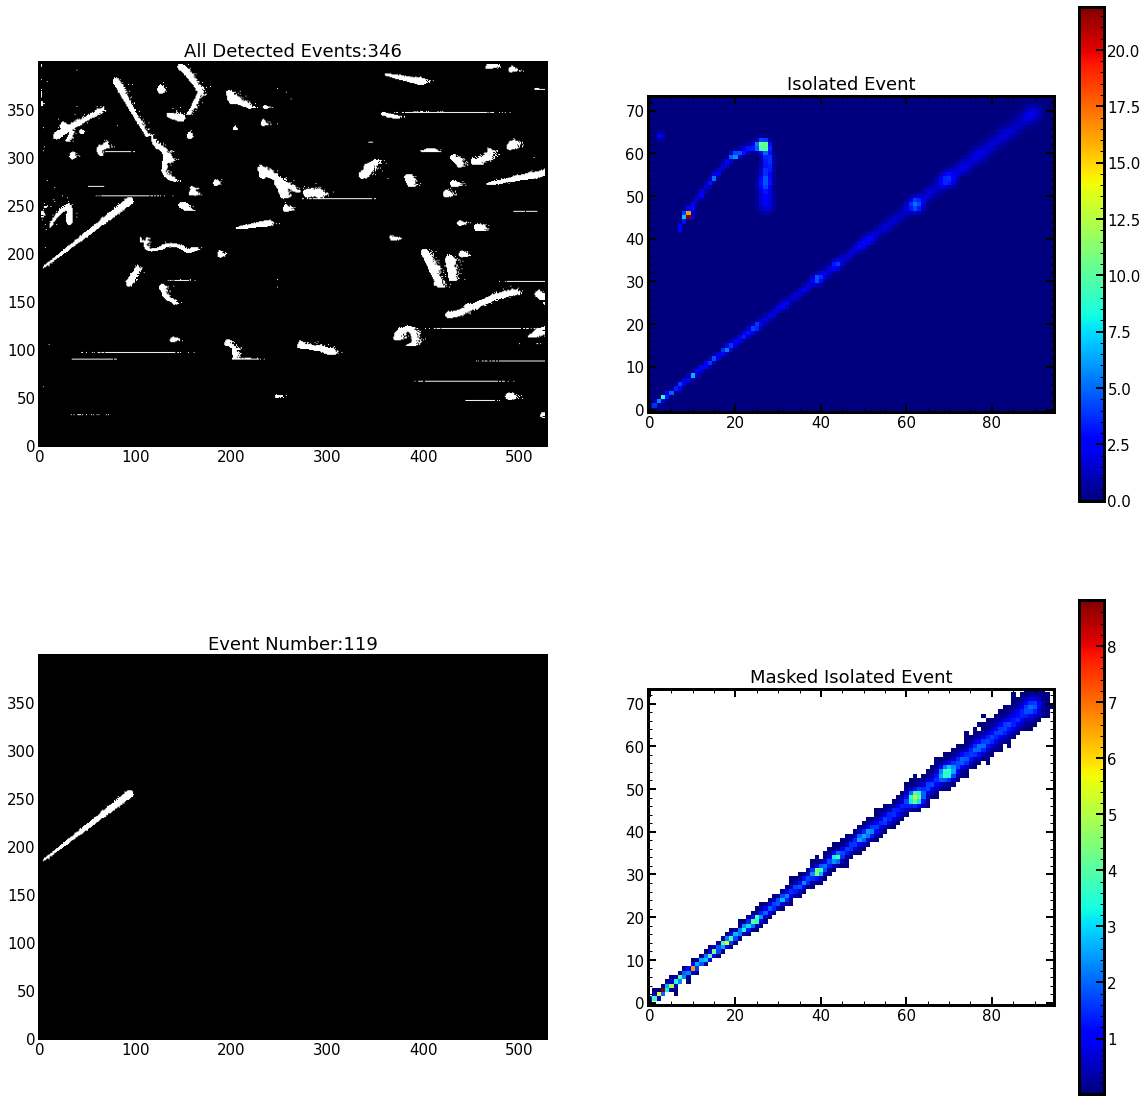

,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
119,100,1,95x74,620,571.728821,0.922,"[55.029, 42.8661]"


In [18]:
n_label = 119
extra = 0


label, n_events = ndimage.label(dataCal > min_energy_for_label,structure=[[1,1,1],[1,1,1],[1,1,1]]) # 48
# label, n_events = ndimage.label(dataCal>6*abs(popt[2]),structure=[[0,1,0],[1,1,1],[0,1,0]]) ## 50, 52
loc = ndimage.find_objects(label==n_label)[0]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=[20,20])
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9)
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

# fig.suptitle('Event Number '+ str(n_label))
## Imagen original
axs[0,0].set_title('All Detected Events:'+str(n_events))
axs[0,0].imshow(label==0, cmap='gist_yarg', vmax=1, vmin=0, origin='lower')
# plt.suptitle('Primer Imagen')

## Evento en la imagen original
axs[1,0].set_title('Event Number:'+str(n_label))
axs[1,0].imshow(label==n_label, cmap='gray', vmax=1,vmin=0, origin='lower')


axs[0,1].set_title('Isolated Event')
x1 = axs[0,1].imshow(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], cmap= Colormap)#, origin = 'lower')
# plt.colorbar()

mask_35 = np.invert(label==n_label)


data_mask = ma.masked_array(dataCal[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], mask_35[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra])
print(len(data_mask[0]))

axs[1,1].set_title('Masked Isolated Event')
x2 = axs[1,1].imshow(data_mask, cmap= Colormap)#, origin='lower')
# axs[1,1].plot(totalFrame.iat[n_label-1, 7][0], totalFrame.iat[n_label-1, 7][1], 'ro') ## Plot the baricentrum
# print('n_label:', n_label)
# plt.legend('Baricentrum')

fig.colorbar(x1, ax=axs[0,1])
fig.colorbar(x2, ax=axs[1,1])
# fig.colorbar(axs[1,1], ax=[[x1,x2]], location = 'bottom', fraction = .1)

print('Event Slice:'  )
print('x: ['+str(loc[1].start)+','+str(loc[1].stop)+']')
print('y: ['+str(loc[0].start)+','+str(loc[0].stop)+']')
# print(loc)
# print(totalFrame.set_index('Event ID').iloc[[n_label-1]])
plt.show()


TotalDataFrame.iloc[[n_label-1]]

## Pruebas de la paquetería Sckit-Image

Centroide:  (110.0, 402.0)
Radio mayor:  0.0
Radio menor:  0.0
Box:  (110, 402, 111, 403)
Centroide Local:  [0. 0.]
Centroid Weighted:  (110.0, 402.0)
Moments Hu:  [0. 0. 0. 0. 0. 0. 0.]
Area_Convex:  1.0
Label:  70
Orientation:  -0.7853981633974483
Slice:  (slice(110, 111, None), slice(402, 403, None))
Eccentricity:  0
Solidity:  1.0
Barycenter:  [0. 0.]
Inertia tensor:  [[ 0. -0.]
 [-0.  0.]]
Intensity Max:  0.01360404584556818


Event Charge:  0.013604046  keV
Local Box:  [1, 1]  px
Local Box:  [15, 15] micras
Diagonal Lenght:  0.0  px
Diagonal Lenght:  0.0  micras
Delta_L:  725.0  px
Delta_L:  10875.0  micras
Delta EL:  1.8764201166300938e-05  keV/px
Delta EL:  1.2509467444200626e-06  keV/micras
Delta EL:  0.18764201166300937  keV/cm


(401.0, 404.0, 109.0, 112.0)

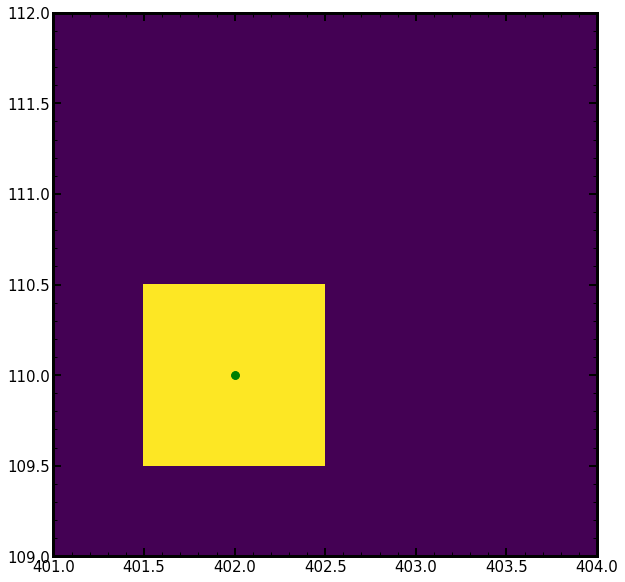

In [19]:
### Esta celda tiene el proceso para ir obteniendo las propiedadesd de un evento con la librería Scikit-Image

n_label= 70
CCD_depth = 725 ## micras
px_to_micras = 15 ## micras
px_to_cm = 0.0015 ## cm/px
micra_to_cm = 1 / 10000 ## micras/cm
fig, ax = plt.subplots(figsize=(10,10))

label_img, nlabels_img = sk.measure.label(dataCal > min_energy_for_label, connectivity=2, return_num=True)
# print(nlabels_img)
ax.imshow(label_img==n_label) # Matriz centrada en el origen

prop = sk.measure.regionprops(label_img,dataCal)
# prop = sk.measure.regionprops(label_img)


# loc = ndimage.find_objects(label==n_label)[0]
loc = prop[n_label-1].slice

mask_35 = np.invert(label_img==n_label)
# ax.imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
charge = data_mask.sum()
# plt.imshow(dataCal[maxim.start:maxim.stop])
# ax.imshow(data_mask)



print("Centroide: ", prop[n_label-1].centroid)
print("Radio mayor: ", prop[n_label-1].axis_major_length)
print("Radio menor: ", prop[n_label-1].axis_minor_length)
print("Box: ", prop[n_label-1].bbox)
print("Centroide Local: ", prop[n_label-1].centroid_local)
print('Centroid Weighted: ', prop[n_label-1].centroid_weighted)
# print(prop[n_label-1].centroid_weighted_local)
# print(prop[n_label-1].coords_scaled)
# print(prop[n_label-1].coords)
# print(prop[n_label-1].extent)
# print(prop[n_label-1].image)
# print(prop[n_label-1].image_intensity)
# print('Moments: ', prop[n_label-1].moments)
# print('Moments Central: ', prop[n_label-1].moments_central)
print('Moments Hu: ', prop[n_label-1].moments_hu)
print('Area_Convex: ', prop[n_label-1].area_convex)
print('Label: ', prop[n_label-1].label)
print('Orientation: ', prop[n_label-1].orientation)
print('Slice: ', prop[n_label-1].slice)
print('Eccentricity: ', prop[n_label-1].eccentricity)
print('Solidity: ', prop[n_label-1].solidity)
print('Barycenter: ', prop[n_label-1].centroid_local)
print('Inertia tensor: ', prop[n_label-1].inertia_tensor)
print('Intensity Max: ', prop[n_label-1].intensity_max)

## Box and Delta_L
miny, minx, maxy, maxx = prop[n_label-1].bbox
Longitud_y = maxy - miny # px
Longitud_x = maxx - minx # px
Diagonal_lenght= np.sqrt(Longitud_x**2 + Longitud_y**2) - np.sqrt(2) # px
Delta_L = np.sqrt(Diagonal_lenght**2 + CCD_depth**2) # px
DeltaEL = charge / Delta_L # keV/px

print('\n')

# new_par = np.sqrt(prop[n_label-1].inertia_tensor[0][0]**2 + prop[n_label-1].inertia_tensor[1][1]**2)/Diagonal_lenght
# print("New Par: ", new_par)
## Ellipse 
y0, x0 = prop[n_label-1].centroid
# y0, x0 = prop[n_label-1].centroid_weighted

orientation = prop[n_label-1].orientation
rotation = orientation*1
x1 = x0 + math.cos(orientation) * 0.5 * prop[n_label-1].axis_minor_length
y1 = y0 - math.sin(orientation) * 0.5 * prop[n_label-1].axis_minor_length

x2 = x0 - math.sin(orientation) * 0.5 * prop[n_label-1].axis_major_length
y2 = y0 - math.cos(orientation) * 0.5 * prop[n_label-1].axis_major_length # Ellipse's major radio

x3 = x0 - math.sin(-orientation) * 0.5 * prop[n_label-1].axis_major_length
y3 = y0 + math.cos(orientation) * 0.5 * prop[n_label-1].axis_major_length # Ellipse's major radio


ax.plot((x0, x1), (y0, y1), 'r', linewidth=1)
ax.plot((x0, x3), (y0, y3), 'b', linewidth=1)
ax.plot((x0, x2), (y0, y2), 'r', linewidth=1)

ax.plot(x0, y0, '.g', markersize=15) # Ellipse's center
ax.plot(prop[n_label-1].centroid_weighted[1], prop[n_label-1].centroid_weighted[0], '.g', markersize=15)


print('Event Charge: ', charge, ' keV')
print("Local Box: ", [Longitud_x, Longitud_y], ' px' )
print("Local Box: ", [Longitud_x * px_to_micras, Longitud_y * px_to_micras], 'micras' )
print('Diagonal Lenght: ', Diagonal_lenght, ' px') ## px
print('Diagonal Lenght: ', Diagonal_lenght * px_to_micras, ' micras')
print('Delta_L: ', Delta_L, ' px')
print('Delta_L: ', Delta_L * px_to_micras, ' micras')
print('Delta EL: ', DeltaEL, ' keV/px')
print('Delta EL: ', DeltaEL / px_to_micras, ' keV/micras')
print('Delta EL: ', DeltaEL / micra_to_cm, ' keV/cm')
bx = (minx, maxx, maxx, minx, minx)
by = (miny, miny, maxy, maxy, miny)
# ax.plot(bx, by, '-b', linewidth=2.5)


# excent = prop[n_label-1].eccentricity
u= x0   #x-position of the center
v= y0    #y-position of the center
b = prop[n_label-1].axis_major_length    #radius on the x-axis
a = prop[n_label-1].axis_minor_length   #radius on the y-axis

ext=1
ax.axis((loc[1].start-ext, loc[1].stop+ext, loc[0].start-ext, loc[0].stop+ext))
# ax.imshow(data_mask)
# ax.can_zoom()

## Filtro de muones 

In [20]:
## Calcula cuantos eventos rectos tiene la extensión comparando la relación del radio mayor de la elipse con el radio menor
DeltaL, DeltaEL, list_charge, lebel_muons, list_theta, list_phi, _, list_elip, list_soli, list_elip_all, list_sol_all = muon_filter(dataCal=dataCal, label_img=label_img, nlabels_img=nlabels_img, 
                                                                                 prop=prop, Solidit=0.65, Elipticity=0.65)
                                                                    
print('All Clusters: ', nlabels_img)
print('Muons Detected: ', len(lebel_muons))
print(lebel_muons)
Straight_Events = lebel_muons


DF_straightevents = pd.DataFrame(lebel_muons, columns=['Event ID'] )
DF_dl = pd.DataFrame(DeltaL, columns=['Delta L (cm)'])
DF_charge = pd.DataFrame(list_charge, columns=['Charge (KeV)'])
DF_dedl = pd.DataFrame(DeltaEL, columns=['dE/dL (KeV/cm)'])
DF_thet = pd.DataFrame(list_theta, columns=['Theta (Rad)'])
DF_phi = pd.DataFrame(list_phi, columns=['Phi (Rad)'])
DF_elip = pd.DataFrame(list_elip, columns=['Elipticity'])
DF_soli = pd.DataFrame(list_soli, columns=['Solidity'])
DF_dEdL = pd.concat([DF_straightevents, DF_dl, DF_charge,  DF_dedl, DF_thet, DF_phi, DF_elip, DF_soli], axis=1)
DF_dEdL.set_index('Event ID')

All Clusters:  346
Muons Detected:  7
[45, 94, 119, 140, 207, 301, 332]


,Delta L (cm),Charge (KeV),dE/dL (KeV/cm),Theta (Rad),Phi (Rad),Elipticity,Solidity
Event ID,,,,,,,
45,0.098170,291.356750,2967.867579,0.739936,6.086949,0.833707,0.709512
94,0.083631,209.596710,2506.210326,0.521839,4.159670,0.677710,0.767442
119,0.192670,571.728821,2967.402394,1.185006,0.654854,0.943747,0.702152
140,0.093933,273.529785,2911.975352,0.689084,0.155015,0.853862,0.830435
207,0.120108,366.090454,3048.005446,0.922760,0.189273,0.895580,0.739754
301,0.089935,301.550995,3353.005163,0.633194,2.670612,0.682755,0.769231
332,0.102244,264.143127,2583.453146,0.782594,6.097219,0.855321,0.803226



****************************************
Minimizer is Minuit / Migrad
Chi2                      =      428.813
NDf                       =          274
Edm                       =   7.0569e-20
NCalls                    =           33
p0                        =      10.1932   +/-   0.122176    
p1                        =    -0.198795   +/-   0.00601823  

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      511.387
NDf                       =          163
Edm                       =  4.20037e-20
NCalls                    =           35
p0                        =     -2.26484   +/-   0.40092     
p1                        =      1.62113   +/-   0.0444916   

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      686.828
NDf                       =          618
Edm                       =  1.89772e-18
NCalls                    =           36
p0                        =     0.513211   +/- 

In [ ]:
index_event = 6 # 0, 1, 4, 8
loc = ndimage.find_objects(label_img == Straight_Events[index_event])[0]
mask_35 = np.invert(label_img == Straight_Events[index_event])
data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
plt.imshow(data_mask)

: 

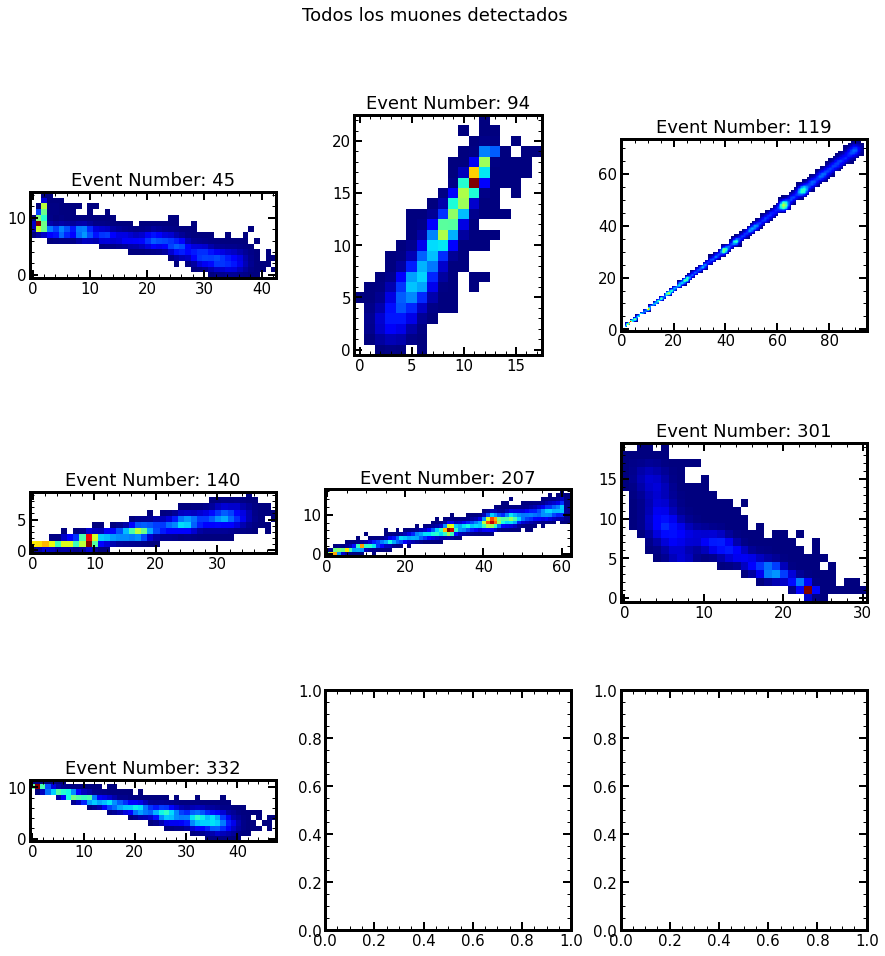

In [21]:
## Visualizar en una matriz los eventos rectos detectados 
coord2x2 = [[0,0],[0,1], [1,0], [1,1]]

coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]

coord4x4 = [[0,0],[0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3], [2,0], [2,1], [2,2], [2,3], [3,0], [3,1], [3,2], [3,3]]

coords5x5 = [[0,0],[0,1], [0,2], [0,3], [0,4], [1,0], [1,1], [1,2], [1,3], [1,4], [2,0], [2,1], [2,2], [2,3], [2,4], [3,0], [3,1], [3,2], [3,3], [3,4],[4,0], [4,1], [4,2], [4,3], [4,4]]

if len(Straight_Events) < 5:
    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(15,15))
    fig.suptitle('Todos los muones detectados')

    for index_event in range(0,len(Straight_Events)):
        loc = ndimage.find_objects(label_img == Straight_Events[index_event])[0]
        mask_35 = np.invert(label_img == Straight_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # plt.imshow(dataCal[maxim.start:maxim.stop])
        # ax.imshow(data_mask)

        axs[coord2x2[index_event][0],coord2x2[index_event][1]].set_title('Event Number: '+ str(Straight_Events[index_event]))
        # axs[coord2x2[index_event][0],coord2x2[index_event][1]].imshow(label_img == Straight_Events[index_event]) ## All image
        # axs[coord2x2[index_event][0],coord2x2[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coord2x2[index_event][0],coord2x2[index_event][1]].imshow(data_mask, cmap = Colormap) ## Event with mask
        # axs[coord2x2[index_event][0],coord2x2[index_event][1]].plot(TF.iat[Straight_Events[index_event]-1, 9][0], TF.iat[Straight_Events[index_event]-1, 9][1],  'ro')#[0], TF.iat[index_

elif len(Straight_Events) > 4 and len(Straight_Events) < 10:
    fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize=(15,15))#, facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('Todos los muones detectados')

    for index_event in range(0,len(Straight_Events)):
        loc = ndimage.find_objects(label_img == Straight_Events[index_event])[0]
        mask_35 = np.invert(label_img == Straight_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # plt.imshow(dataCal[maxim.start:maxim.stop])
        # ax.imshow(data_mask)

        axs[coord3x3[index_event][0],coord3x3[index_event][1]].set_title('Event Number: '+ str(Straight_Events[index_event]))
        # axs[coord3x3[index_event][0],coord3x3[index_event][1]].imshow(label_img == Straight_Events[index_event]) ## All image
        # axs[coord3x3[index_event][0],coord3x3[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coord3x3[index_event][0],coord3x3[index_event][1]].imshow(data_mask, aspect = 1,  cmap= Colormap) ## Event with mask
        # axs[coord3x3[index_event][0],coord3x3[index_event][1]].plot(TF.iat[Straight_Events[index_event]-1, 9][0], TF.iat[Straight_Events[index_event]-1, 9][1],  'ro')#[0], TF.iat[index_event, 7][1], 'ro') ## Plot the baricentrum

elif len(Straight_Events) > 9 and len(Straight_Events) < 17:
    fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize=(15,15))#, facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('Todos los muones detectados')

    for index_event in range(0,len(Straight_Events)):
        loc = ndimage.find_objects(label_img == Straight_Events[index_event])[0]
        mask_35 = np.invert(label_img == Straight_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

        # coordX_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[1])
        # coordY_centerCharge = round(ndimage.center_of_mass(data_maskEvent)[0])
        # Barycentercharge = data_maskEvent[coordY_centerCharge, coordX_centerCharge]

        axs[coord4x4[index_event][0],coord4x4[index_event][1]].set_title('Número de evento: '+ str(Straight_Events[index_event]))
        # axs[coord4x4[index_event][0],coord4x4[index_event][1]].imshow(label_img == Straight_Events[index_event]) ## All image
        # axs[coord4x4[index_event][0],coord4x4[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coord4x4[index_event][0],coord4x4[index_event][1]].imshow(data_mask, aspect = 1, cmap = Colormap) ## Event with mask
        # axs[coord4x4[index_event][0],coord4x4[index_event][1]].plot(TF.iat[Straight_Events[index_event]-1, 9][0], TF.iat[Straight_Events[index_event]-1, 9][1],  'ro')#[0], TF.iat[index_
        # axs[coord4x4[index_event][0],coord4x4[index_event][1]].text(1,0,'dE/dx', transform = axs[coord4x4[index_event][0],coord4x4[index_event][1]].transAxes)

elif len(Straight_Events) > 16 and len(Straight_Events) <= 25:
    fig, axs = plt.subplots(ncols = 5, nrows = 5, figsize=(15,15))#, facecolor = [0, 0.4470, 0.7410])
    fig.suptitle('Todos los muones detectados')

    for index_event in range(0,len(Straight_Events)):
        loc = ndimage.find_objects(label_img == Straight_Events[index_event])[0]
        mask_35 = np.invert(label_img == Straight_Events[index_event])
        data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # plt.imshow(dataCal[maxim.start:maxim.stop])
        # ax.imshow(data_mask)        

        axs[coords5x5[index_event][0],coords5x5[index_event][1]].set_title('Número de evento: '+ str(Straight_Events[index_event]))
        # axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(label_img == Straight_Events[index_event])
        # axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop]) ## Event without mask
        axs[coords5x5[index_event][0],coords5x5[index_event][1]].imshow(data_mask, aspect = 1, cmap = Colormap) ## Event with mask

elif len(Straight_Events) > 25:
    print('Demasiados eventos para mostrar!!!')



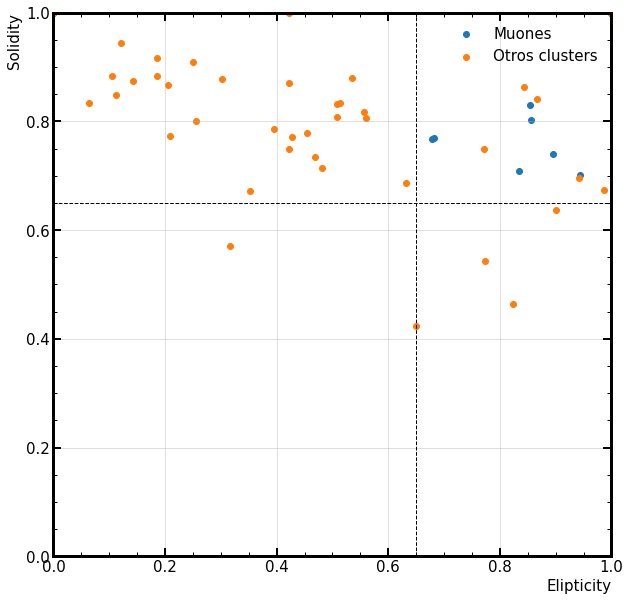

In [22]:
fig, axs = plt.subplots(ncols = 1, nrows = 1, figsize=(10,10))
axs.scatter(list_elip, list_soli, label = 'Muones')
axs.scatter(list_elip_all, list_sol_all, label = 'Otros clusters')
axs.set_ylabel("Solidity")
axs.set_xlabel("Elipticity")

axs.vlines(0.65, 0, 1, colors="k", linestyles="dashed")
axs.hlines(0.65, 0, 1, colors="k", linestyles="dashed")

axs.set_ylim(0, 1)
axs.set_xlim(0, 1)
axs.legend()
axs.grid()
plt.show()

## Medición el ángulo phi

### Posición del píxel

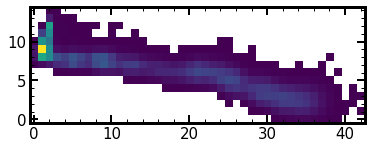

Shape of image (X, Y):  43 15
Ordenada:  10.193235323330313
Pendiente:  -0.19879450201420845
Probabilidad:  6.2722206722753195e-09
Chi square:  25.122047021310994

pendiente negativa, muon horizontal
El muon está en el sector 4
El ángulo phi es:  4.516152821473985  rad o 258.75649630655806°


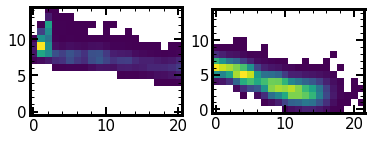


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      428.813
NDf                       =          274
Edm                       =   7.0569e-20
NCalls                    =           33
p0                        =      10.1932   +/-   0.122176    
p1                        =    -0.198795   +/-   0.00601823  


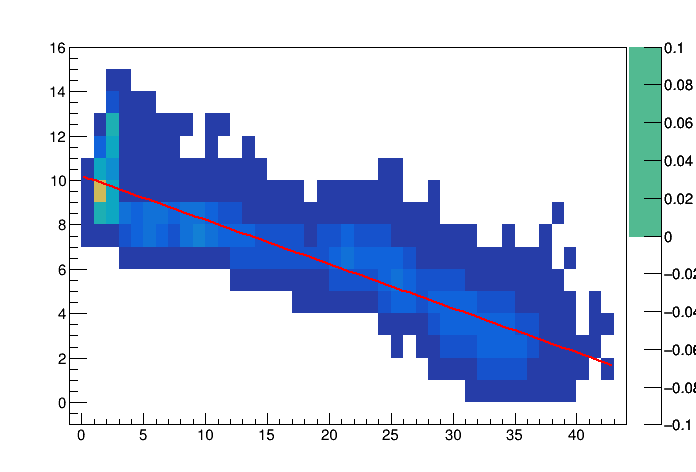

In [23]:
index_event = 0
loc = ndimage.find_objects(label_img == Straight_Events[index_event])[0]
mask_35 = np.invert(label_img == Straight_Events[index_event])
data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
plt.imshow(data_mask)
plt.show()

# print(data_mask)

NBX = data_mask.shape[1]
xmin = 0
xmax = NBX
# print(NBX, len(data_mask[:, 1]))

NBY = data_mask.shape[0]
ymin = 0
ymax = NBY
# print(NBY, len(data_mask[1, :]))
print('Shape of image (X, Y): ', NBX, NBY)

Diagonal_lenght= np.sqrt(NBX**2 + NBY**2) - np.sqrt(2) # px
Delta_L = np.sqrt( (Diagonal_lenght * px_to_micras)**2 + (CCD_depth)**2) * micra_to_cm # cm
charge = data_mask.sum()


canv = TCanvas("C1")

### -------------- Hist Muon ------------- ####
nbx = NBX
lox = 0
hix = data_mask.shape[1]

nby = NBY
loy = 0
hiy = data_mask.shape[0]

hist2d = TH2F("hist2d", "", nbx,lox,hix, nby,loy,hiy)
hist2d.SetStats(False)

for i in np.arange(0, nbx):
    for j in np.arange(0, nby):
        # cont = data_mask[i][j]
        if data_mask[j][i]:
            hist2d.SetBinContent(int(i+1),int(j+1), data_mask[j][i])
        else:
            # n = n+1
            # print(n)
            cont = 0
            hist2d.SetBinContent(int(i+1),int(j+1), cont)

### ---------------------------------------- ###

frame = TH2F("frame", "", NBX+1,-1,NBX+1,NBY+1,-1,NBY+1)
frame.AddDirectory(False)
frame.SetStats(0)

lox = 0
hix = NBX
fitline = TF1("fitline", "[0] + [1]*x",lox,hix) 

diag = np.sqrt(NBX**2 + NBY**2)
pend = NBY/NBX

# fitline.SetParameters(NBY-1, -pend)
hist2d.Fit("fitline", "R")  #### Funcionó aunque los paŕametros iniciales fueron malos

ordenada = fitline.GetParameters()[0]
pendiente = fitline.GetParameters()[1]
Prob = fitline.GetProb()
Chi2 = fitline.GetChisquare()

print('Ordenada: ', ordenada)
print('Pendiente: ', pendiente)
print('Probabilidad: ', Prob)
print("Chi square: ", Chi2/np.sqrt(charge), end= '\n\n')


frame = TH2F("frame", "", NBX+1,-1,NBX+1,NBY+1,-1,NBY+1)
canv.Draw()
frame.Draw()
frame.SetStats(0)
hist2d.Draw("samecolz")

fitline.Draw("same")

flag_hor = False
flag_ver = False

### ====== Determinación de si el muon es horizontal, vertical u oblicuo ====== ###
if NBX > NBY * 2:
    fig, axs = plt.subplots(1, 2)

    flag_hor = True
    c_l = data_mask[:, 0:int(NBX/2)]
    c_r = data_mask[:, int(NBX/2):NBX]

    axs[0].imshow(c_l)
    axs[1].imshow(c_r)  

elif NBY > NBX * 2:
    fig, axs = plt.subplots(1, 2)
    
    flag_ver = True
    c_d = data_mask[:int(NBY/2), :]
    c_u = data_mask[int(NBY/2):NBY, :]

    axs[0].imshow(c_d)
    axs[1].imshow(c_u) 
     
else: 
    fig, axs = plt.subplots(2, 2)

    c_ld = data_mask[0:int(NBY/2), 0:int(NBX/2)]
    c_lu = data_mask[int(NBY/2):NBY, 0:int(NBX/2)]
    c_rd = data_mask[0:int(NBY/2),int(NBX/2):NBX]
    c_ru = data_mask[int(NBY/2):NBY, int(NBX/2):NBX]

    axs[0,0].imshow(c_lu)
    axs[0,1].imshow(c_ru)
    axs[1,0].imshow(c_ld)
    axs[1,1].imshow(c_rd)
### =========================================================================== ###


if flag_hor: ## Es un muon horizontal
    if pendiente > 0:
        ## El muon puede estar en el cuadrante 1 o 3
        print('pendiente positiva, muon horizontal')

        n_cl = 0
        n_cr = 0
        for index_y in np.arange(0, len(c_l)):
            # print(index)
            for index_x in np.arange(0, len(c_l[0])):
                # print(index_x)
                if c_l[index_y][index_x] != 0:
                    n_cl = n_cl +1

        for index_y in np.arange(0, len(c_r)):
            # print(index)
            for index_x in np.arange(0, len(c_r[0])):
                # print(index_x)
                if c_r[index_y][index_x] != 0:
                    n_cr = n_cr +1
        print(n_cl, n_cr)

        if n_cr > n_cl:
            print('El muon está en el sector 1')
            phi = np.arctan(pendiente)
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')

        elif n_cr > n_cl:
            print('El muon está en el sector 3')
            phi = np.arctan(pendiente) + np.pi
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')
    else: 
        print('pendiente negativa, muon horizontal')
        ### El muon puede estar en el cuadrante 2 o 4

        n_cl = 0
        n_cr = 0
        for index_y in np.arange(0, len(c_l)):
            # print(index)
            for index_x in np.arange(0, len(c_l[0])):
                # print(index_x)
                if c_l[index_y][index_x] != 0:
                    n_cl = n_cl +1

        for index_y in np.arange(0, len(c_r)):
            # print(index)
            for index_x in np.arange(0, len(c_r[0])):
                # print(index_x)
                if c_r[index_y][index_x] != 0:
                    n_cr = n_cr +1

        if n_cr < n_cl:
            print('El muon está en el sector 2')
            phi = np.arctan(pendiente)  + np.pi/2
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')

        elif n_cr > n_cl:
            print('El muon está en el sector 4')
            phi = np.arctan(pendiente) + 3 * np.pi/ 2
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')

if flag_ver: ## Es un muon horizontal
    if pendiente > 0:
        ## El muon puede estar en el cuadrante 1 o 3
        print('pendiente positiva')

        n_cu = 0
        n_cd = 0
        for index_y in np.arange(0, len(c_d)):
            # print(index)
            for index_x in np.arange(0, len(c_d[0])):
                # print(index_x)
                if c_d[index_y][index_x] != 0:
                    n_cd = n_cd + 1

        for index_y in np.arange(0, len(c_u)):
            # print(index)
            for index_x in np.arange(0, len(c_u[0])):
                # print(index_x)
                if c_u[index_y][index_x] != 0:
                    n_cu = n_cu + 1

        if n_cu > n_cd:
            print('El muon está en el sector 1')
            phi = np.arctan(pendiente)
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')

        elif n_cu < n_cd:
            print('El muon está en el sector 3')
            phi = np.arctan(pendiente) + np.pi
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')
    else: 
        print('pendiente negativa')
        ### El muon puede estar en el cuadrante 2 o 4

        n_cu = 0
        n_cd = 0
        for index_y in np.arange(0, len(c_u)):
            # print(index)
            for index_x in np.arange(0, len(c_u[0])):
                # print(index_x)
                if c_u[index_y][index_x] != 0:
                    n_cu = n_cu + 1

        for index_y in np.arange(0, len(c_d)):
            # print(index)
            for index_x in np.arange(0, len(c_d[0])):
                # print(index_x)
                if c_d[index_y][index_x] != 0:
                    n_cd = n_cd + 1

        if n_cu > n_cd:
            print('El muon está en el sector 2')
            phi = np.arctan(pendiente)  + np.pi/2
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')

        elif n_cu < n_cd:
            print('El muon está en el sector 4')
            phi = np.arctan(pendiente) + 3 * np.pi/ 2
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')


if not flag_ver and not flag_hor: ## Otros casos
    if pendiente > 0:
        ## El muon puede estar en el cuadrante 1 o 3
        print('pendiente positiva')

        n_cu = 0
        n_cd = 0
        for index_y in np.arange(0, len(c_ld)):
            # print(index)
            for index_x in np.arange(0, len(c_ld[0])):
                # print(index_x)
                if c_ld[index_y][index_x] != 0:
                    n_cd = n_cd + 1

        for index_y in np.arange(0, len(c_ru)):
            # print(index)
            for index_x in np.arange(0, len(c_ru[0])):
                # print(index_x)
                if c_ru[index_y][index_x] != 0:
                    n_cu = n_cu + 1

        if n_cu > n_cd:
            print('El muon está en el sector 1')
            phi = np.arctan(pendiente)
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')

        elif n_cu < n_cd:
            print('El muon está en el sector 3')
            phi = np.arctan(pendiente) + np.pi
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')
    else: 
        print('pendiente negativa')
        ### El muon puede estar en el cuadrante 2 o 4

        n_cu = 0
        n_cd = 0
        for index_y in np.arange(0, len(c_lu)):
            # print(index)
            for index_x in np.arange(0, len(c_lu[0])):
                # print(index_x)
                if c_lu[index_y][index_x] != 0:
                    n_cu = n_cu + 1

        for index_y in np.arange(0, len(c_rd)):
            # print(index)
            for index_x in np.arange(0, len(c_rd[0])):
                # print(index_x)
                if c_rd[index_y][index_x] != 0:
                    n_cd = n_cd + 1

        if n_cu > n_cd:
            print('El muon está en el sector 2')
            phi = np.arctan(pendiente)  + np.pi/2
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')

        elif n_cu < n_cd:
            print('El muon está en el sector 4')
            phi = np.arctan(pendiente) + 3 * np.pi/ 2
            print('El ángulo phi es: ', phi, ' rad o ' + str(np.degrees(phi)) + '°')
      

# Prueba de rotación de un evento antificial

In [24]:
def pixel_rot(x_bin, x0, y_bin, y0, theta):
    diff_x = x_bin - x0
    diff_y = y_bin - y0

    new_x = diff_x * np.cos(theta) - diff_y * np.sin(theta) + x0
    new_y = diff_x * np.sin(theta) + diff_y * np.cos(theta) + y0

    return int(np.around(new_x, 0)), int(np.around(new_y, 0))

Shcape (x, y):  12 10
Box:  (3, 5, 4, 9)


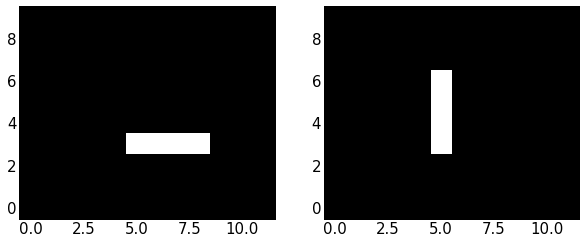

In [36]:
fig, axs = plt.subplots(1,2, figsize = [10,10])
example = np.zeros((10,12))
example_copy = np.zeros((10,12))

example[3][8] = 1
example[3][7] = 1
example[3][6] = 1
example[3][5] = 1


po = 3.9
print('Shcape (x, y): ', example.shape[1], example.shape[0])

n_label = 1
label_img, nlabels_img = sk.measure.label(example > 0.1, connectivity=2, return_num=True)
axs[0].imshow(example, cmap = 'gray')
# axs[1].imshow(label_img==0, cmap = 'gray')

prop = sk.measure.regionprops(label_img,example)
loc = prop[n_label-1].slice
# print('Loc: ', loc)

# print(loc[0].start, loc[0].stop, loc[1].start, loc[1].stop)
print("Box: ", prop[n_label-1].bbox) # Formato: xin, yin, xfin, yfin
# print("Centroide Local: ", prop[n_label-1].centroid_local)
# print('Centroid Weighted: ', prop[n_label-1].centroid_weighted)

### === Matriz de rotaciones === ###

flag_firstbin = False
for x_bin in range(0, example.shape[1]):
    for y_bin in range(0, example.shape[0]):
        if example[y_bin][x_bin] > 0 and not flag_firstbin:
            x0, y0 = x_bin, y_bin
            nx, ny = pixel_rot(x_bin=x_bin, x0=x0, y_bin=y_bin, y0=y0, theta= np.pi/2)
            example_copy[ny][nx] = example[y_bin][x_bin]
            flag_firstbin = True
            # print(example[y_bin][x_bin])

        elif example[y_bin][x_bin] > 0 and flag_firstbin:
            nx, ny = pixel_rot(x_bin=x_bin, x0=x0, y_bin=y_bin, y0=y0, theta= np.pi/2)
            example_copy[ny][nx] = example[y_bin][x_bin]
            flag_firstbin = True

axs[1].imshow(example_copy, cmap = 'gray')


# Rotación del evento (ref a toda la imagen)

Esto solo lo hago una vez


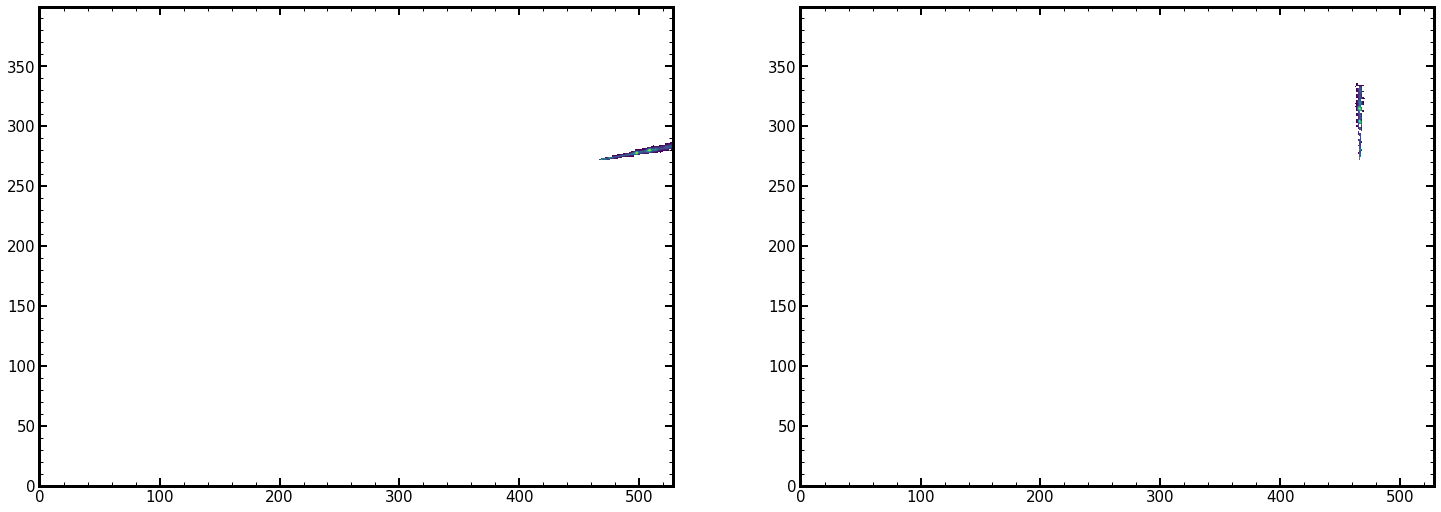

In [55]:
### Esta celda tiene el proceso para ir obteniendo las propiedadesd de un evento con la librería Scikit-Image

n_label= 207
CCD_depth = 725 ## micras
px_to_micras = 15 ## micras
px_to_cm = 0.0015 ## cm/px
micra_to_cm = 1 / 10000 ## micras/cm
fig, ax = plt.subplots(1,2, figsize=(25,25))

label_img, nlabels_img = sk.measure.label(dataCal > min_energy_for_label, connectivity=2, return_num=True)
# ax[0,0].imshow(label==0, cmap='gist_yarg', vmax=1, vmin=0, origin='lower') # Matriz centrada en el origen
# ax[1,0].imshow(label_img==0, cmap='gist_yarg', vmax=1, vmin=0, origin='lower') # Matriz centrada en el origen

prop = sk.measure.regionprops(label_img,dataCal)
loc = prop[n_label-1].slice
mask_35 = np.invert(label_img==n_label)

# ax.imshow(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

# data_mask = ma.masked_array(dataCal[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
data_mask = ma.masked_array(dataCal, mask_35)

data_mask_zeros = np.zeros((data_mask.shape[0], data_mask.shape[1]))
thet = np.pi/2 - 0.189273

flag_firstbin = False
for x_bin in range(0, data_mask.shape[1]):
    for y_bin in range(0, data_mask.shape[0]):
        if data_mask[y_bin][x_bin] > 0 and not flag_firstbin:
            x0, y0 = x_bin, y_bin
            nx, ny = pixel_rot(x_bin=x_bin, x0=x0, y_bin=y_bin, y0=y0, theta= thet)
            data_mask_zeros[ny][nx] = data_mask[y_bin][x_bin]
            flag_firstbin = True
            print('Esto solo lo hago una vez')
            # print(example[y_bin][x_bin])

        elif data_mask[y_bin][x_bin] > 0 and flag_firstbin:
            nx, ny = pixel_rot(x_bin=x_bin, x0=x0, y_bin=y_bin, y0=y0, theta= thet)
            data_mask_zeros[ny][nx] = data_mask[y_bin][x_bin]


label_img, nlabels_img = sk.measure.label(data_mask_zeros > 0, connectivity=2, return_num=True)
mask_rot = np.invert(label_img==1)
data_mask_rot = ma.masked_array(data_mask_zeros, mask_rot)

ax[0].imshow(data_mask)
ax[1].imshow(data_mask_rot)

plt.show()


Shcape (x, y):  12 10
Box:  (3, 5, 4, 8)


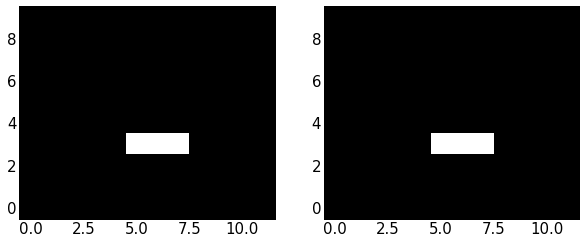

In [ ]:
fig, axs = plt.subplots(1,2, figsize = [10,10])
example = np.zeros((10,12))
example_copy = np.zeros((10,12))

example[3][7] = 1
example[3][6] = 1
example[3][5] = 1


po = 3.9
print('Shcape (x, y): ', example.shape[1], example.shape[0])

n_label = 1
label_img, nlabels_img = sk.measure.label(example > 0.1, connectivity=2, return_num=True)
axs[0].imshow(example, cmap = 'gray')
# axs[1].imshow(label_img==0, cmap = 'gray')

prop = sk.measure.regionprops(label_img,example)
loc = prop[n_label-1].slice
# print('Loc: ', loc)

# print(loc[0].start, loc[0].stop, loc[1].start, loc[1].stop)
print("Box: ", prop[n_label-1].bbox) # Formato: xin, yin, xfin, yfin
# print("Centroide Local: ", prop[n_label-1].centroid_local)
# print('Centroid Weighted: ', prop[n_label-1].centroid_weighted)

### === Matriz de rotaciones === ###

for x_bin in range(0, example.shape[1]):
    for y_bin in range(0, example.shape[0]):
        if example[y_bin][x_bin] > 0:

            nx, ny = pixel_rot(x_bin=x_bin, x0=6, y_bin=y_bin, y0=3, theta= 2 * np.pi)
            example_copy[ny][nx] = example[y_bin][x_bin]
            # print(example[y_bin][x_bin])

axs[1].imshow(example_copy, cmap = 'gray')
